In [141]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.linalg import null_space
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [86]:
#Generate Data
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target

# In general, it's a good idea to scale the data prior to PCA.
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [87]:
# we have 4 variables with each having 150 observations 
# the above will give a k by k, sample covareince matrix 
# from scartch and barely vectorized not optimized nor libraries used

def Covariance_m(matrix):
    size = matrix.shape[1]
    Sample_covariance_m = np.zeros((size, size))
    means = np.mean(matrix, axis=0)
    centered_data = matrix - means
    for j in range(len(Sample_covariance_m)):
        for k in range(len(Sample_covariance_m)):
            Sample_covariance_m[j , k] = (np.sum(centered_data[:,j] * centered_data[:,k])) / (matrix.shape[0] -1)
    return Sample_covariance_m

def proj(b, a):
    mul = ((np.dot(a, b)) / (np.dot(b, b)))
    return mul * b

def QR_factor(matrix):

    size = len(matrix)
    Q, R , u = np.zeros((size, size)), np.zeros((size, size)), np.zeros((size, size))

    for k in range(size):
        if k != 0:
            final_sum = 0
            for j in range(k):
                initial_sum = proj(u[j], matrix[:,k])
                final_sum += initial_sum
            u[k] = matrix[:, k] - final_sum

        else:
            u[k] = matrix[:,0]
            
    for index in range(size):
        e_i = u[index] / np.linalg.norm(u[index])
        Q[:,index] = e_i

    for i in range(size):
        for j in range(i , size):
            R[i, j] = np.dot(Q[:,i], matrix[:,j])
    return Q , R

def QR_alg(A_0, max_iter=1000):

    Q, R = QR_factor(A_0)
    for _ in range(max_iter):
        A_0 = np.dot(R, Q)
        Q, R = QR_factor(A_0)
    return A_0

def sorted_eigenvalues(matrix):
    eigen = QR_alg(matrix)
    eigenvalues = []
    for i in range(len(eigen)):
        for j in range(i, len(eigen)):
            if i == j:
                eigenvalues.append(eigen[i, j])
    return sorted(eigenvalues, reverse=True)

def sorted_eigenvectors(matrix):
    size = len(matrix)
    eigenvectors = np.zeros((size, size))
    eigenvalues_list = sorted_eigenvalues(matrix)

    for index, eigenvalue in enumerate(eigenvalues_list):

        A = matrix - eigenvalue * np.identity(size, dtype=None, like=None)
        eigenvector = null_space(A)
        eigenvectors[:, index] = eigenvector.T / np.linalg.norm(eigenvector)
        
    return eigenvectors

def PCA(Data, axes):
    centered_data = Data - np.mean(Data, axis=0) 

    Covariance_matrix = Covariance_m(Data)

    sorted_eigenvectors_cov = sorted_eigenvectors(Covariance_matrix)[:, 0 : axes]
    projected_data = np.dot(centered_data,sorted_eigenvectors_cov)
    
    return projected_data

array([[ 0.52106591,  0.37741762, -0.71956635,  0.26128628],
       [-0.26934744,  0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 ,  0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654,  0.06694199,  0.63427274,  0.52359713]])

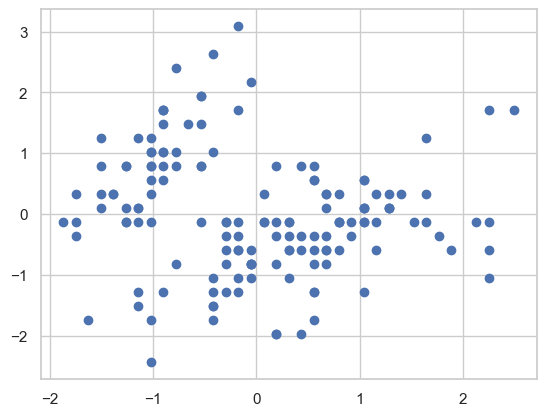

In [110]:
plt.scatter(X[:, 0], X[:, 1])



In [118]:
projected_data = PCA(X, 3)
projected_data.mean(axis=0)

array([3.63413003e-16, 7.38529608e-17, 1.99840144e-16])

In [131]:
projected_data = PCA(X, 3)
cov = Covariance_m(X)
eigen_vectors = sorted_eigenvectors(cov)[:, 0:3]

array([[ 1.00000000e+00, -4.62136556e-16,  8.73683814e-17],
       [-4.62136556e-16,  1.00000000e+00, -1.05161661e-16],
       [ 8.73683814e-17, -1.05161661e-16,  1.00000000e+00]])

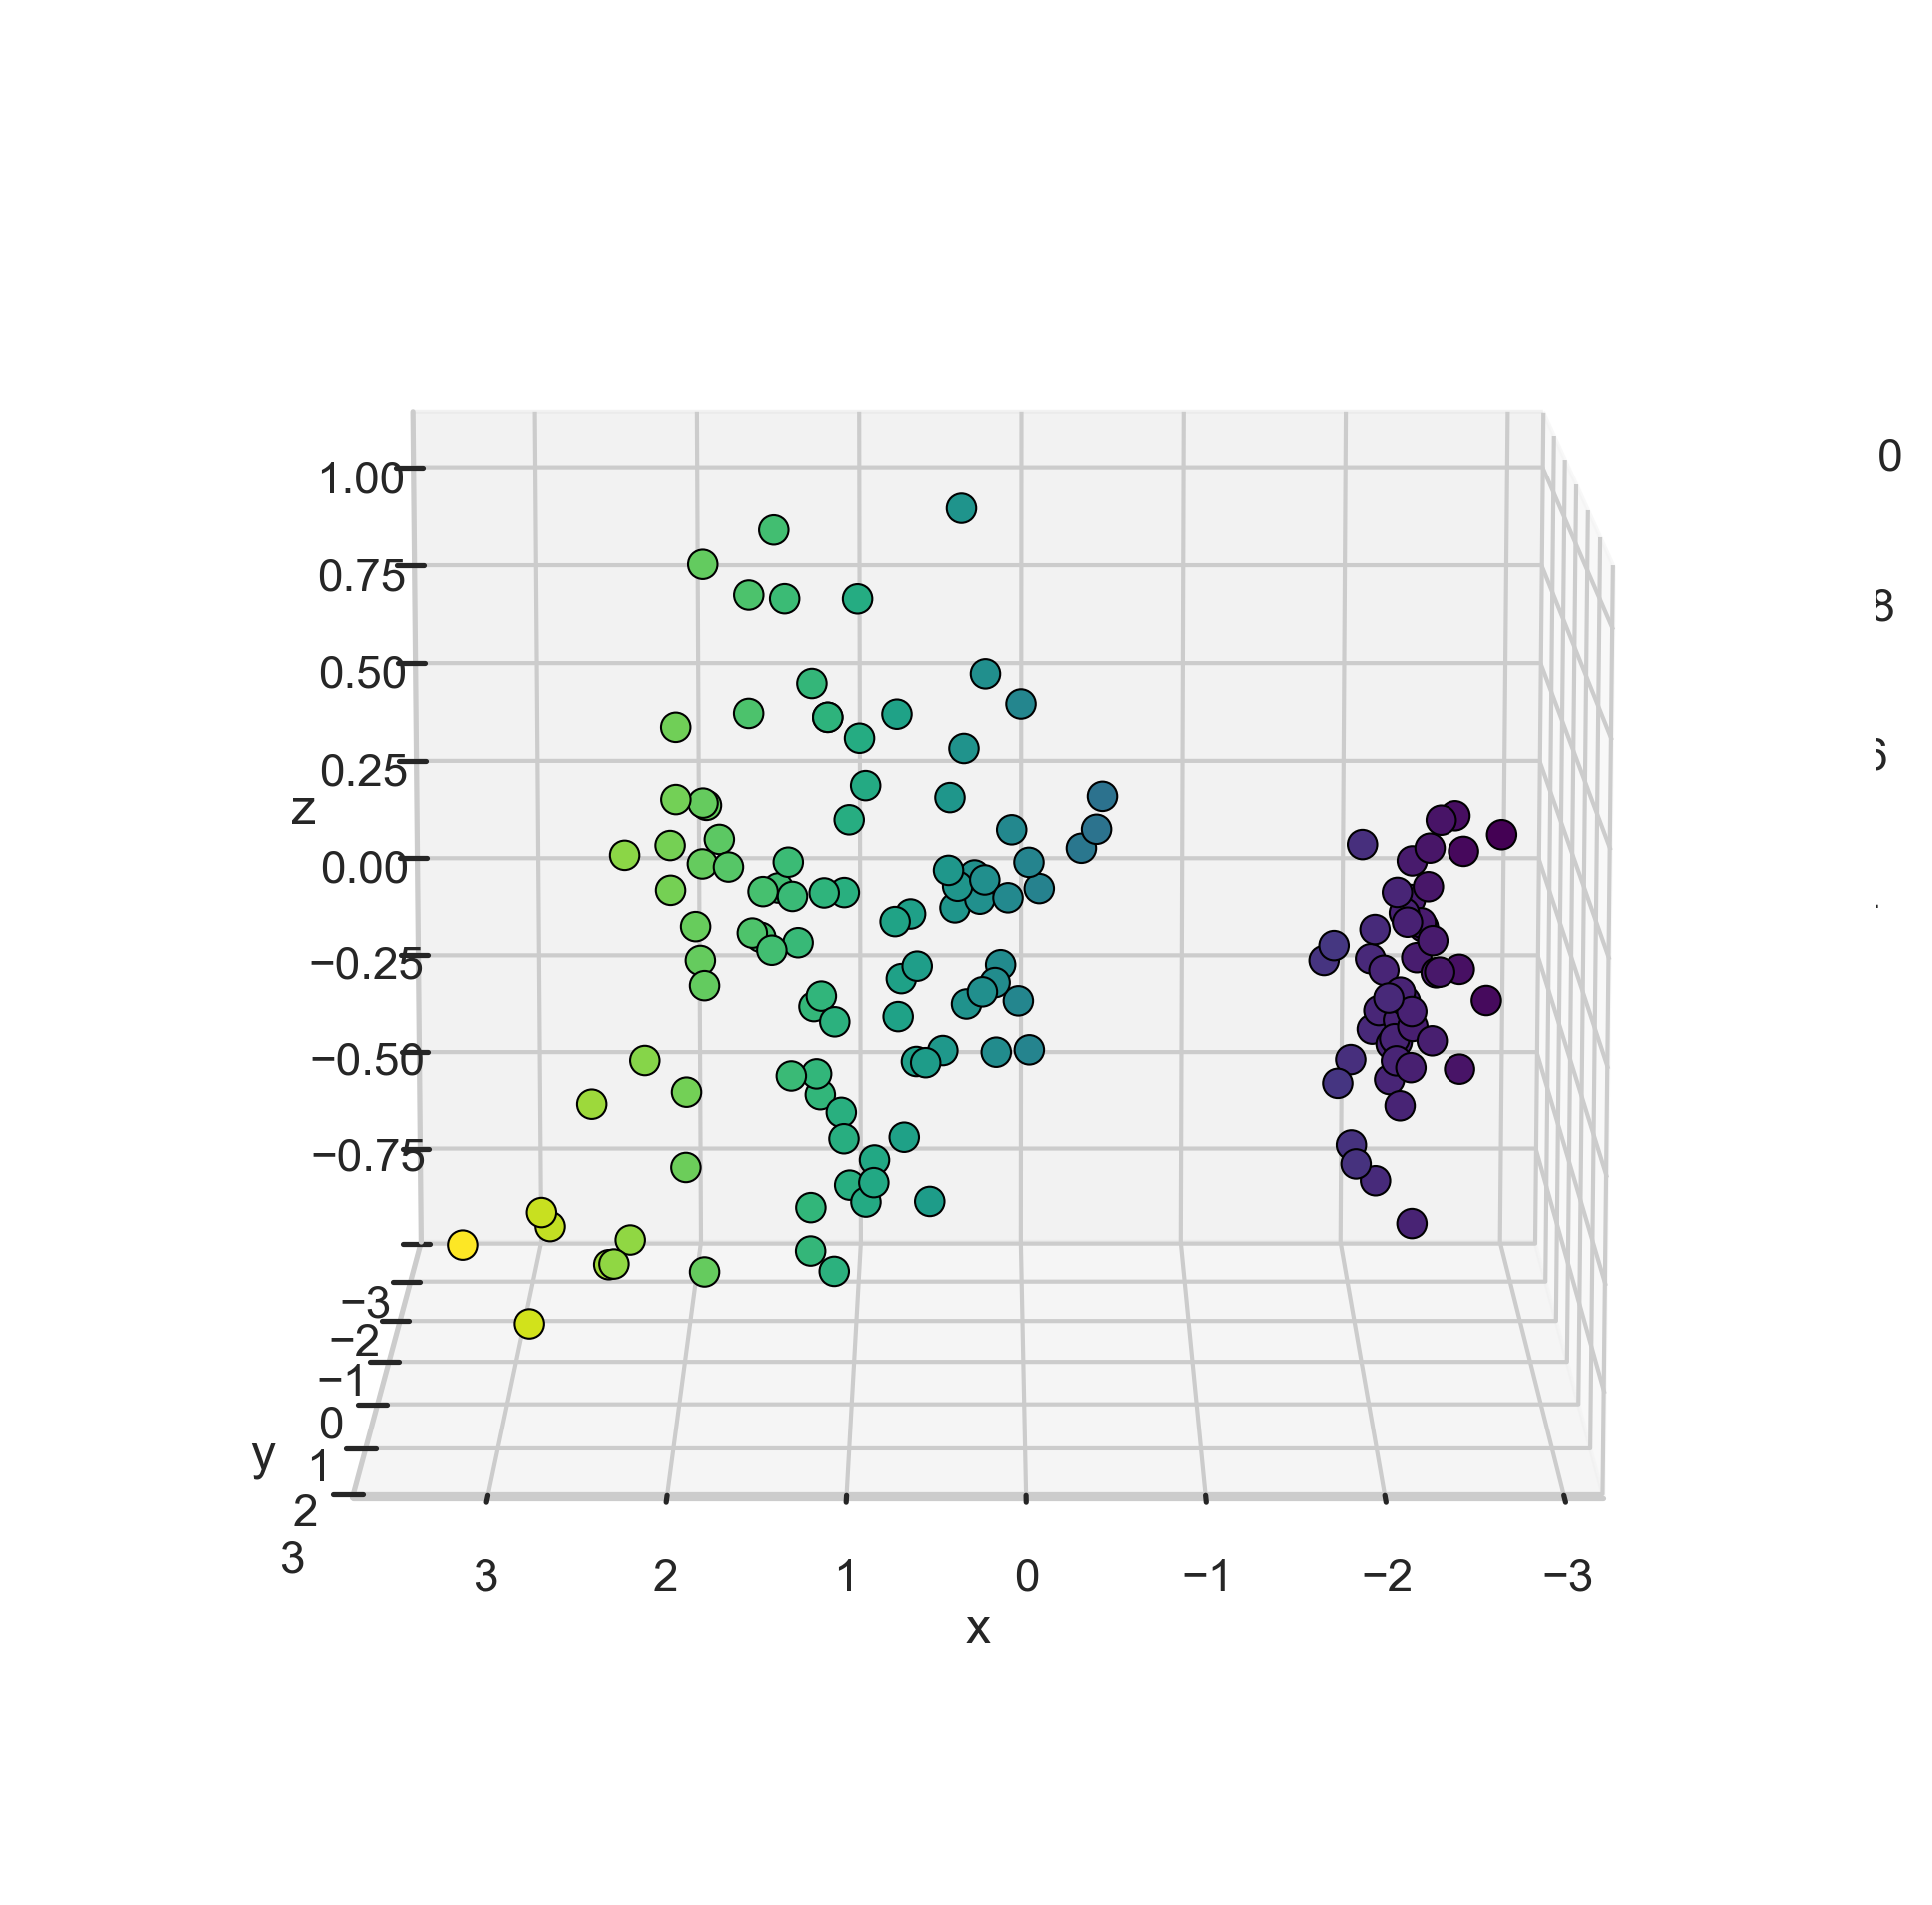

In [142]:


fig = plt.figure(figsize=(10, 8), dpi=300)
ax = fig.add_subplot(111, projection='3d')

x = projected_data[:, 0]
y = projected_data[:, 1]
z = projected_data[:, 2]


ax = plt.axes(projection='3d')
ax.scatter3D(x, y , z,c=x ,alpha=1, s=50, cmap='viridis', edgecolors='black', linewidth=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=10, azim=90)
principal_axes_3d = np.eye(3)
plt.show()
